In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
import pandas as pd

In [91]:
def mouse(N, sds, prob):
  norm_head = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([0,0]), torch.Tensor([[0.16,0],[0,0.16]]))
  norm_ear1 = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([-1,1]), torch.Tensor([[0.04,0],[0,0.04]]))
  norm_ear2 = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([1,1]), torch.Tensor([[0.04,0],[0,0.04]]))

  head_sample = norm_head.sample(torch.Size([1,N]))
  torch.reshape(head_sample, torch.Size([N,2]))
  ear1_sample = norm_ear1.sample(torch.Size([1,N]))
  ear2_sample = norm_ear2.sample(torch.Size([1,N]))
  x = torch.cat((head_sample[0,:][:,0], ear1_sample[0,:][:,0], ear2_sample[0,:][:,0]))
  y = torch.cat((head_sample[0,:][:,1], ear1_sample[0,:][:,1], ear2_sample[0,:][:,1]))
  labels = np.concatenate((np.array(['head' for i in range(N)]), np.array(['ear1' for i in range(N)]), np.array(['ear2' for i in range(N)])))
  df = pd.DataFrame()
  df["x"] = x
  df["y"] = y
  df["label"] = labels
  return df
  

In [95]:
dataframe = mouse(10000, [0.4, 0.2], 0.8)

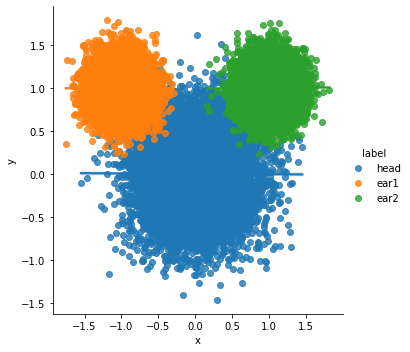

In [96]:
sns.lmplot(data = dataframe, x = "x", y = "y",hue = "label")

In [97]:
data_zip = list(zip(dataframe["x"], dataframe["y"]))

#kmeans = KMeans(n_clusters=3)
#kmeans.fit(data)

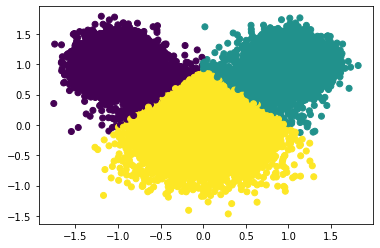

In [98]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_zip)
plt.scatter(dataframe["x"], dataframe["y"], c=kmeans.labels_)
plt.show()